In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Importing auxiliary libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy.stats
from scipy import spatial
from scipy import optimize
from scipy import special

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# Importing the data from CSV-files and setting extent and resolution
geo_data = gp.create_data([0,2000,0,2000,0,2000],[100,100,100],
                          path_o = "C:/Users/Jan/gempy/notebooks/input_data/tut_chapter1/simple_fault_model_orientations.csv", # importing orientation (foliation) data
                          path_i = "C:/Users/Jan/gempy/notebooks/input_data/tut_chapter1/simple_fault_model_points.csv") # importing point-positional interface data

In [7]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"Fault_Series":'Main_Fault',
                      "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['Main_Fault',
                                         'Sandstone_2','Siltstone', 'Shale', 'Sandstone_1',
                                         ], verbose=0)

# unconformity model:
#gp.set_series(geo_data, {"Fault_Series":'Main_Fault', "Unconf_Series":'Carbonate',
#                      "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1')},
#                       order_series = ["Fault_Series", "Unconf_Series", 'Strat_Series'],
#                       order_formations=['Main_Fault', 'Carbonate',
#                                         'Sandstone_2','Siltstone', 'Shale', 'Sandstone_1',
#                                         ], verbose=0)

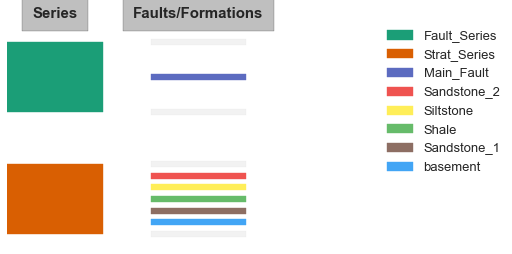

In [8]:
%matplotlib inline
gp.get_sequential_pile(geo_data)

In [12]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1,1], output='geology', compile_theano=True, theano_optimizer='fast_compile')
#print(interp_data)

Compiling theano function...


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '11188')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\Jan\AppData\Local\Theano\compiledir_Windows-10-10.0.17134-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.4-64\lock_dir


Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [13]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


../../..\gempy\gempy_front.py:955: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


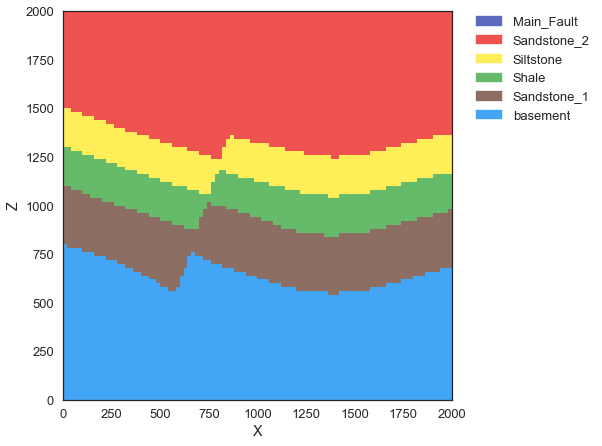

In [14]:
%matplotlib inline
gp.plot_section(geo_data, lith_block[0], cell_number=50,  direction='y', plot_data=False)

../../..\gempy\gempy_front.py:977: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


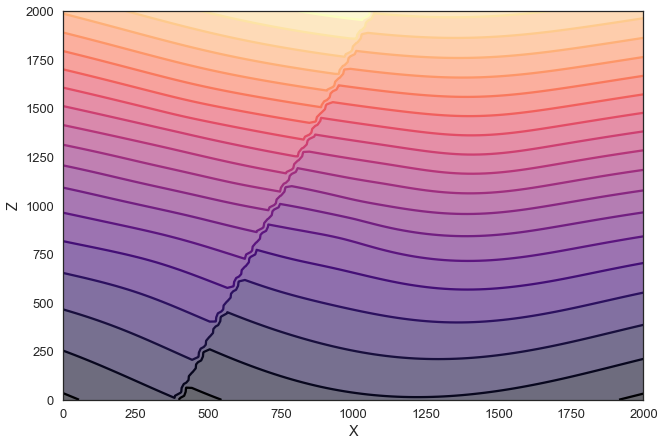

In [24]:
gp.plot_scalar_field(geo_data, lith_block[1], cell_number=50, N=20,
                        direction='y', plot_data=False)

../../..\gempy\gempy_front.py:955: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


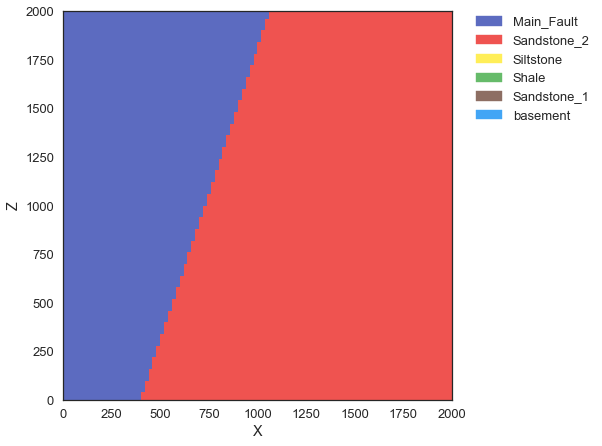

In [16]:
gp.plot_section(geo_data, fault_block[0], cell_number=25, plot_data=False)

In [17]:
print(lith_block)

[[ 6.        6.        6.       ...  2.        2.        2.      ]
 [30.347836 30.352757 30.357658 ... 31.03495  31.041965 31.048943]]


In [18]:
print(fault_block)

[[ 1.        1.        1.       ...  2.        2.        2.      ]
 [39.65608  39.65932  39.662563 ... 39.007404 39.010647 39.013893]]
